In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [24]:
datos = pd.read_csv('./home_data.csv')
datos.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
nuevo = datos[['grade','bedrooms','price']]
nuevos_nombres = {'grade': 'metros', 'bedrooms': 'cuartos','price': 'precio'}
df = nuevo.rename(columns=nuevos_nombres)
df.head()

,metros,cuartos,precio
0,7,3,221900.0
1,7,3,538000.0
2,6,2,180000.0
3,7,4,604000.0
4,8,3,510000.0


In [7]:
df.corr()

,metros,cuartos,precio
metros,1.000000,0.356967,0.667434
cuartos,0.356967,1.000000,0.308350
precio,0.667434,0.308350,1.000000


In [8]:
x = df[['metros','cuartos']]
x

,metros,cuartos
0,7,3
1,7,3
2,6,2
3,7,4
4,8,3
...,...,...
21608,8,3
21609,8,4
21610,7,2
21611,8,3


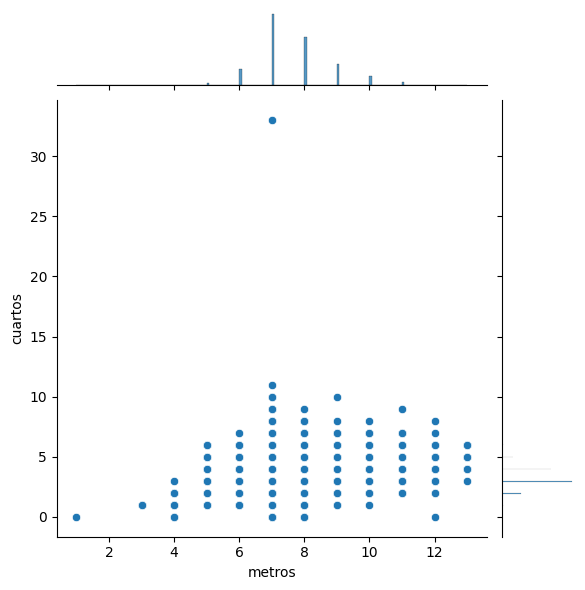

In [12]:
sns.jointplot(x=x.metros,y=x.cuartos,data=x);

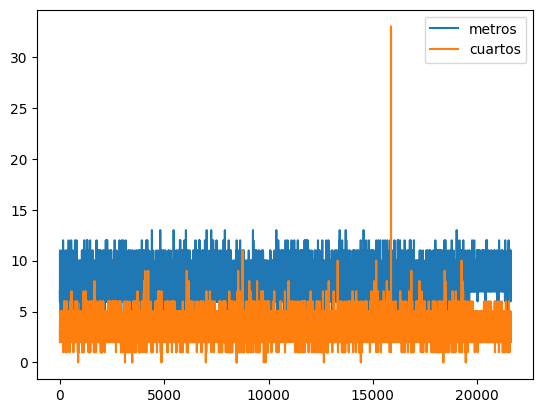

In [13]:
x.plot();

In [15]:
x_trainf,x_testf = train_test_split(x,test_size=0.2,random_state=42)
x_traind,x_testd = train_test_split(df,test_size=0.2,random_state=42)


In [18]:
modelo = LinearRegression()
X = x_trainf
Y = x_traind.precio

modelo.fit(X,Y)

print('Coeficiente beta1: ',modelo.coef_,modelo.intercept_)

Coeficiente beta1:  [196287.5160071   32440.41996389] -1073850.0137881567


In [19]:
y_pred = modelo.predict(X)
print(y_pred)

[790058.89016745 168755.92218225 201196.34214614 ... 397483.85815324
 -59972.01378875 429924.27811713]


In [20]:
print(r2_score(Y,y_pred))

0.44846320659143457


In [23]:
metros2 = float(input('Ingrese los metros cuadrados de la casa'))
cuartos = float(input('Ingrese el numero de cuartos'))
precio = modelo.coef_[0]*metros2+modelo.coef_[1]*cuartos+modelo.intercept_
print(precio)

397483.8581532405
